In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
plt.rcdefaults()
#source_id, ra, dec, parallax,phot_g_mean_mag, radial_velocity, radial_velocity_error, pm



In [4]:
query = """
SELECT TOP 10000
source_id, ra, dec, parallax,phot_g_mean_mag, radial_velocity, radial_velocity_error, pm
From gaiadr3.gaia_source as g
WHERE radial_velocity is NOT NULL
AND pm is NOT NULL
AND parallax is NOT NULL
AND phot_g_mean_mag is NOT NULL
ORDER BY  radial_velocity DESC
"""

In [5]:
job = Gaia.launch_job_async(query=query)
df = job.get_results().to_pandas()

INFO: Query finished. [astroquery.utils.tap.core]


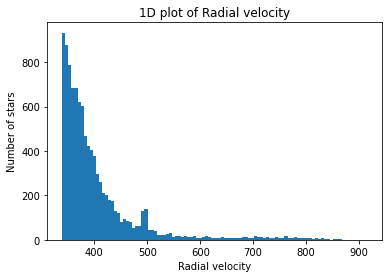

In [6]:
df['phot_g_mean_mag']
plt.hist(df['radial_velocity'] ,bins=100)
plt.title("1D plot of Radial velocity")
plt.xlabel("Radial velocity")
plt.ylabel("Number of stars")
plt.show()

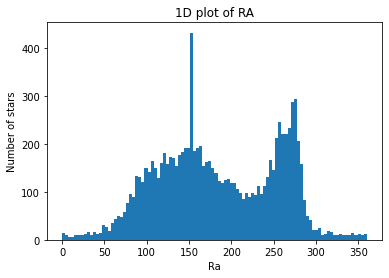

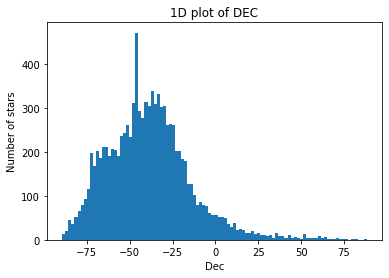

In [7]:
plt.hist(df['ra'] , bins=100)
plt.title("1D plot of RA")
plt.axis()
plt.xlabel("Ra")
plt.ylabel("Number of stars")
plt.show()

plt.hist(df['dec'] , bins=100)
plt.title("1D plot of DEC")
plt.axis()
plt.xlabel("Dec")
plt.ylabel("Number of stars")
plt.show()

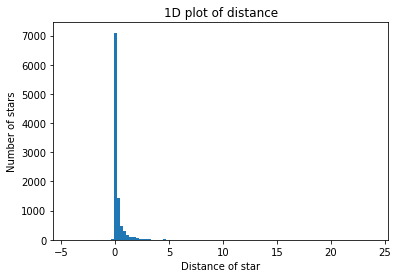

In [8]:
plt.hist(df['parallax'] , bins=100)
plt.title("1D plot of distance")
plt.axis()
plt.xlabel('Distance of star')
plt.ylabel("Number of stars")
plt.show()

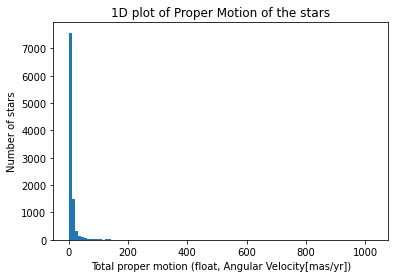

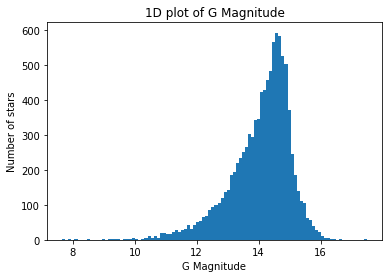

In [9]:
plt.hist(df['pm'], bins=100)
plt.title("1D plot of Proper Motion of the stars")
plt.xlabel("Total proper motion (float, Angular Velocity[mas/yr])")
plt.ylabel("Number of stars")
plt.show()

plt.hist(df['phot_g_mean_mag'] , bins=100)
plt.title("1D plot of G Magnitude")
plt.axis()
plt.xlabel("G Magnitude")
plt.ylabel("Number of stars")
plt.show()



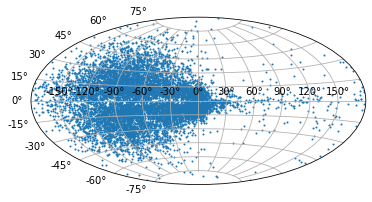

In [10]:
import math
pi = math.pi
from astropy.coordinates import SkyCoord  
from astropy.coordinates import ICRS, Galactic, FK4, FK5  
from astropy.coordinates import Angle, Latitude, Longitude
import astropy.units as u

ra = np.array(df['ra'])
dec = np.array(df["dec"])

eq = SkyCoord(ra,dec, frame = 'icrs' , unit = 'deg')
gal = eq.galactic
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian,s=1)



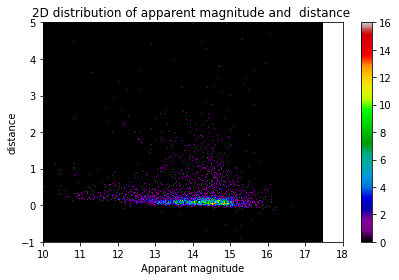

In [11]:

plt.hist2d( df['phot_g_mean_mag'] ,  df['parallax'], bins = [1000,1000],cmap = plt.cm.nipy_spectral)
plt.title("2D distribution of apparent magnitude and  distance ")

plt.xlim(10,18)
plt.ylim(-1,5)
plt.colorbar()
  
plt.xlabel('Apparant magnitude') 
plt.ylabel('distance') 
  
# show plot
plt.tight_layout() 
plt.show()

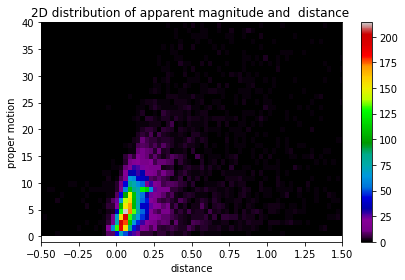

In [12]:
#2D distribution of distance and proper motion of all the stars of your class

plt.hist2d( df['parallax'] ,  df['pm'], bins = [1000,1000],cmap = plt.cm.nipy_spectral)
plt.title("2D distribution of apparent magnitude and  distance ")

plt.xlim(-0.5,1.5)
plt.ylim(-1,40)
plt.colorbar()
  
plt.xlabel('distance') 
plt.ylabel('proper motion') 
  
# show plot
plt.tight_layout() 
plt.show()

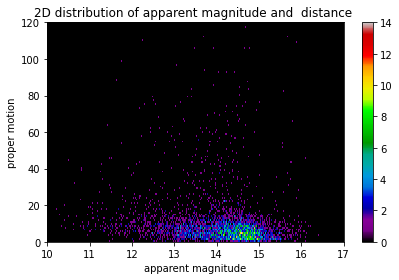

In [20]:
#2D distribution of distance and proper motion of all the stars of your class

plt.hist2d( df['phot_g_mean_mag'] ,  df['pm'], bins = [1000,1000],cmap = plt.cm.nipy_spectral)
plt.title("2D distribution of apparent magnitude and  distance ")

plt.xlim(10,17)
plt.ylim(0,120)
plt.colorbar()
  
plt.xlabel('apparent magnitude') 
plt.ylabel('proper motion') 
  
# show plot
plt.tight_layout() 
plt.show()